### Necessary Imports

In [49]:
# Import numpy and matplotlib
import numpy as np
import matplotlib.pyplot as plt

### Reading Data

In [50]:
# Read the dataset csv
data = np.genfromtxt('price-prediction.csv', delimiter=',')

### Visualize Datapoints in Data

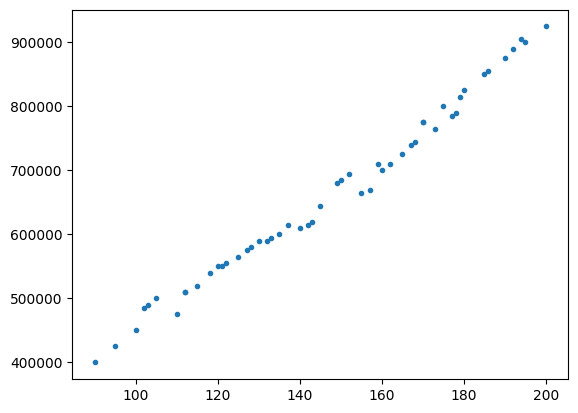

In [51]:
# Plot the dataset
plt.plot(data[:,0], data[:,1], '.')

### Some Base Functions

In [ ]:
def plot_data(m, b, data):
    # Plot the data points as a scatter plot
    plt.scatter(data[:,0], data[:,1], label='Data Points')
    
    # Find min and max values in the data
    x_min = np.min(data[:,0])
    x_max = np.max(data[:,0])

    # Plot the line defined by y = m * x + b
    plt.plot([x_min, x_max], [m * x_min + b, m * x_max + b], '-', color='red', label='Regression Line')
    
    # Set the labels for the x and y axes
    plt.xlabel('x')
    plt.ylabel('y')

    # Set the title for the plot
    plt.title('Linear Regression')
    
    # Add a legend
    plt.legend()
    
    # Display the plot
    plt.show()

In [53]:
data

array([[     nan,      nan],
       [1.20e+02, 5.50e+05],
       [1.45e+02, 6.45e+05],
       [1.60e+02, 7.00e+05],
       [1.10e+02, 4.75e+05],
       [1.80e+02, 8.25e+05],
       [1.00e+02, 4.50e+05],
       [1.90e+02, 8.75e+05],
       [1.55e+02, 6.65e+05],
       [1.30e+02, 5.90e+05],
       [2.00e+02, 9.25e+05],
       [9.00e+01, 4.00e+05],
       [1.75e+02, 8.00e+05],
       [1.65e+02, 7.25e+05],
       [1.40e+02, 6.10e+05],
       [1.50e+02, 6.85e+05],
       [1.05e+02, 5.00e+05],
       [1.95e+02, 9.00e+05],
       [1.25e+02, 5.65e+05],
       [1.15e+02, 5.20e+05],
       [1.70e+02, 7.75e+05],
       [1.35e+02, 6.00e+05],
       [1.85e+02, 8.50e+05],
       [9.50e+01, 4.25e+05],
       [1.78e+02, 7.90e+05],
       [1.28e+02, 5.80e+05],
       [1.57e+02, 6.70e+05],
       [1.12e+02, 5.10e+05],
       [1.92e+02, 8.90e+05],
       [1.33e+02, 5.95e+05],
       [1.03e+02, 4.90e+05],
       [1.22e+02, 5.55e+05],
       [1.73e+02, 7.65e+05],
       [1.67e+02, 7.40e+05],
       [1.42e+

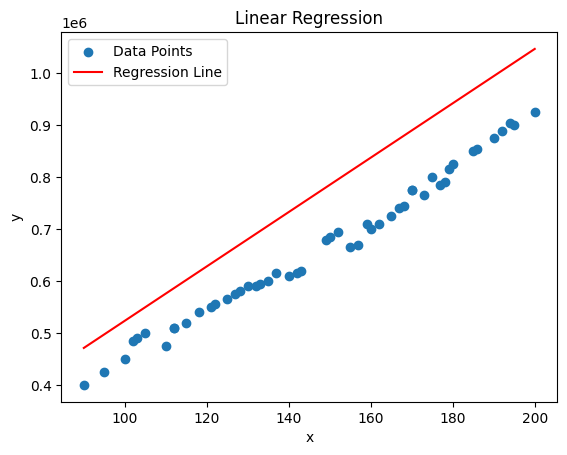

In [62]:
plot_data(5236,0,data)
data = data[1:]


In [55]:
def loss_function(m, c, points):
    # Initialize the total error to 0
    total_error = 0
    
    # Loop through all the points in the dataset
    for point in points:
   
        # Get the 'x' and 'y' values of the current 'point'     
        x = point[0]
        y = point[1]
        
        # Calculate the error for this point and add it to the total error
        total_error += (y - (m * x + c)) ** 2
    
    # Return the average error for all points
    return total_error / float(len(points))

In [78]:
# Formula of slope: -1/N * x * (y - (m * x + b))
# Formula of y_intercept: -1/N * (y - (m * x + b))

def gradien_descent(current_m, current_b, points, lr):
    # Initialize the gradients for m and b to 0
    gradient_m = 0
    gradient_b = 0
    
    # Get the number of points in the dataset
    N = float(len(points))

    # Loop through all the points in the dataset
    for point in points:
        
        # Get the 'x' and 'y' values of the current 'point'
        x = point[0]
        y = point[1]

        # Calculate the partial derivatives of the loss function with respect to m and b
        gradient_m += (-1/N) * x * (y - (current_m * x + current_b))
        gradient_b += (-1/N) * (y - (current_m * x + current_b))
    
    # Update 'm' and 'b' using gradient descent
    updated_m = current_m - lr * gradient_m
    updated_b = current_b - lr * gradient_b
    
    # Return the updated values of m and b
    return updated_m, updated_b

### Running Script

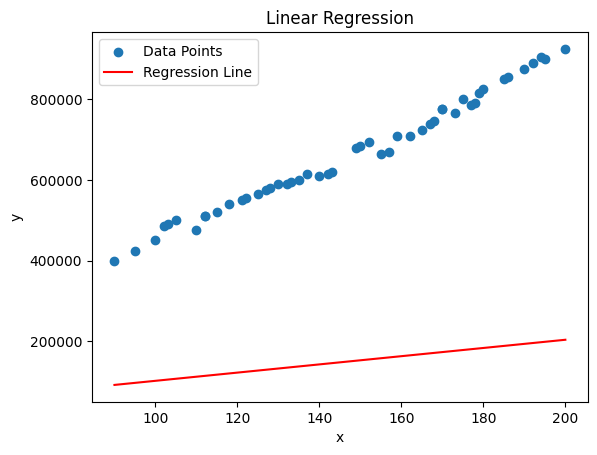

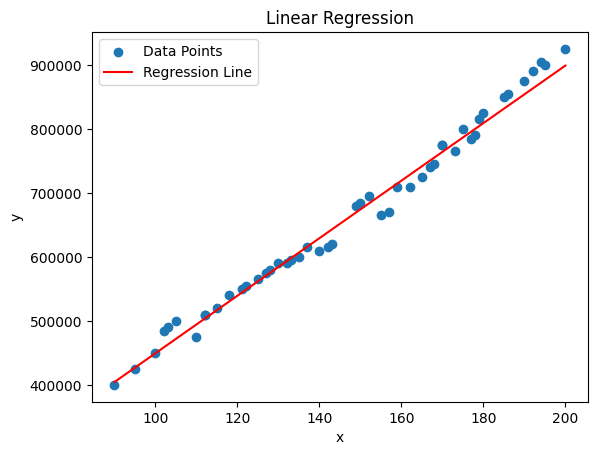

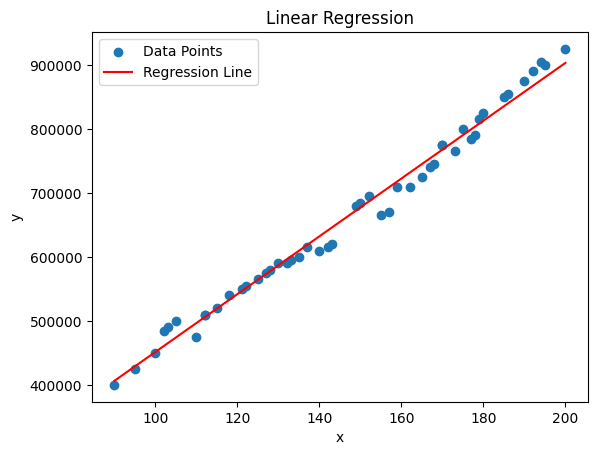

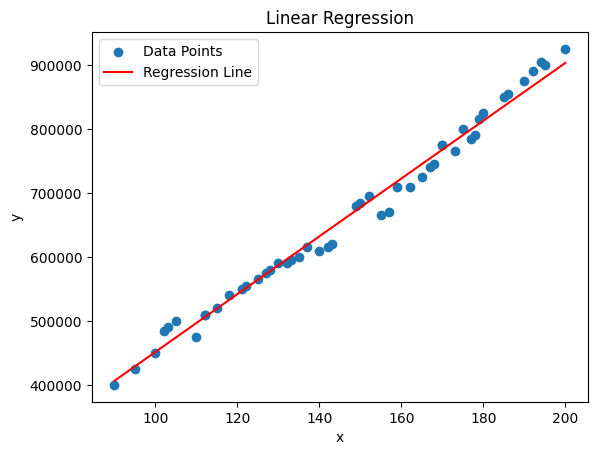

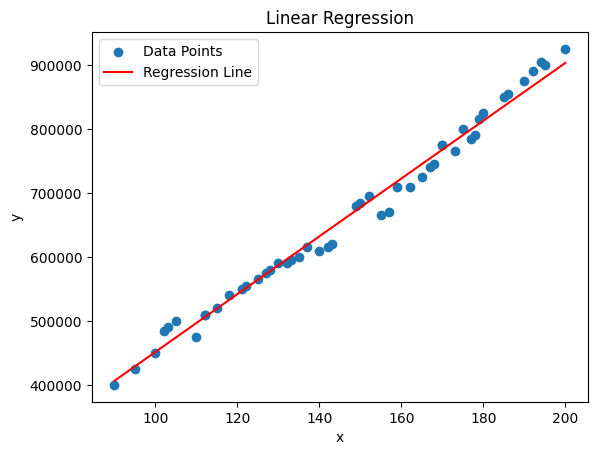

Final values of m and b: 4515.6063204739485 29.109899959596923


In [85]:
# Initialize the values of m and b to 0
m = 0
b = 0

# Set the learning rate and number of epochs for gradient descent
lr = 0.00001
loss_l = []

# Perform gradient descent for the specified number of epochs
for i in range(100):

    # Update m and b using gradient descent
    m,b = gradien_descent(m, b, data, lr)

    # get loss
    loss = loss_function(m, b, data)
    loss_l.append(loss)
    if i % 20 == 0:
        plt.clf()

        # Plot the current data
        plot_data(m, b, data)

# Print the final values of m and b
print('Final values of m and b:', m, b)

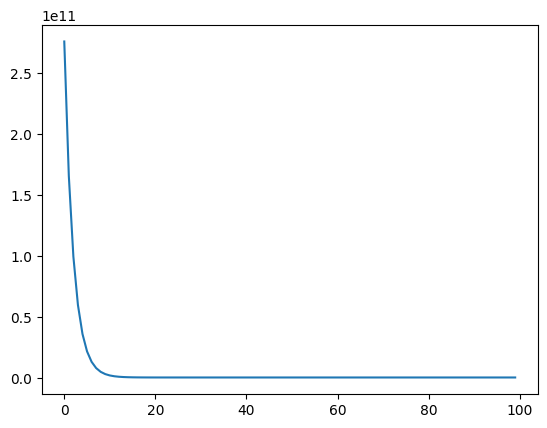

In [84]:
plt.plot(loss_l)

### Predicting New Data

In [77]:
# Read a datapoint as 'x' from the user
x = 1000

# Does a prediction by calculating mx+b
prediction = m * x + b

# Print the prediction
print(f'Price for {x} size of plot should be around $:{prediction}')

Price for 1000 size of plot should be around $:4470927.834656278


<hr>